# Aprendiendo sobre arboles de desición

- Descarga el dataset del titanic: 
  - https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
- Importamos las librerías pandas y matplotlib para apoyarnos en el análisis exploratorio de datos

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

- Abriré el dataset y lo guardaré en una variable llamada titanic

In [43]:
titanic = pd.read_csv("/content/drive/MyDrive/Datasets/titanic.csv", sep=",")

## Análisis exploratorio de datos

- Realizamos una previsualización de los datos para poder esbozar las caracteríasticas de los datos

In [44]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


### Eliminación de características no relevantes
Como dentro de cualquier análisis exploratorio existen caracteerísticas que no son reelevantes o incidentes en el análiss de datos por lo que características como el nombre y el fare (costo del boleto)
- Eleminaremos esas columnas

In [45]:
columnsToDrop=['Name', 'Fare']
titanic.drop(columnsToDrop, axis="columns", inplace=True)

Sin embargo seguimos requiriendo limpiar los nombres de las columnas para poder trabajar con mayor eficiencia
- Renombraremos las columnas

In [46]:
titanic.columns=['Survived', 'Pclass', 'Sex', 'Age', 'SibsAb', 'ParAb']
titanic.head(10)

,Survived,Pclass,Sex,Age,SibsAb,ParAb
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,27.0,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [47]:
print(titanic.shape)

(887, 6)


In [48]:
# Análisis de tipos de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibsAb        int64
ParAb         int64
dtype: object

### Transformación de tipos de datos

Requerimos cambiar los datos de la característica Sex de male y female por 1 y 0

In [49]:
# Cambio de tipos de datos
titanic.Sex=titanic.Sex.apply(lambda x : 1 if x=="male" else 0)
titanic.head()

,Survived,Pclass,Sex,Age,SibsAb,ParAb
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [50]:
# Comprobando el cambio
titanic.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibsAb        int64
ParAb         int64
dtype: object

### Reordenamiento de las columnas

In [51]:
titanic=titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibsAb', 'ParAb']]
titanic.head()

,Survived,Pclass,Sex,Age,SibsAb,ParAb
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


# Entrenamiento con arboles de decisión

- Importamos la librería sklearn en su paquete model_selector y traemos de ahí train_test_split
- Tomamos dos variables, en una vamos a guardar todo excepto la característica a detectar y en la segunda solo la caacterística a detectar.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x=titanic.drop("Survived", axis=1)
y=titanic.Survived

- Tomamos la función train_test_split y le pasamos las variables que creamos en el paso anterior. De esto definimos una regla de 70%/30%, 30% test y 70% training
  - para esto generamos una semilla con el atributo random_state para que los datos sean reproducibles si es que así se requiere la variable random_state=00000.

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=00000)

- Entrenamiento del arbol de desición
  - Establecemos para el arbol de decisión necesitamos definir una profundidad del arbol ya que este tiende a hacer overfitting con poca cantidad de registros (entiendase poca cantidad a menos de 10k registros)
  - Establecemos de nuevo que los datos pueden ser reproducibles así que de nuevo establecemos random_state=00000

In [55]:
from sklearn.tree import DecisionTreeClassifier as DT
tree=DT(max_depth=2, random_state=00000)

- Fit del arbol de decisión
  - Tomamos la función fit de DT y le pasamosX_train y Y_train como parámetros

In [56]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

# Evaluación con arboles de decisión 

- Primer establecemos una Y predicha y con la función predict generamos una predicción en base a los datos de entrenamiento (la parte de fit)

In [57]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

## Cálculo de métricas

Como es un modelo de clasificación debemos encontrar el porcentaje de certeza con respecto a los datos de entrenamiento con respecto a los datos de test o prueba. Para ello:
- Importaremos desde SkLearn el paquete metrics y desde ahí traeremos la función accuracy_score.


In [58]:
from sklearn.metrics import accuracy_score

- Crearemos una variable para almacenar el accuracy en train que resulta del output de la función accuracy_score. 
  - Como parámetros recibe los datos de entrenamiento y la salida de datos de la predicción, en este caso recibirá y_train y y_train_pred

In [59]:
accuracy_train=accuracy_score(Y_train, y_train_pred)

Para compararlos realizaremos la evaluación del accuracy en test

In [60]:
accuracy_test=accuracy_score(Y_test, y_test_pred)
print(f"el accuracy en train es {accuracy_train} y \nel accuracy en test es {accuracy_test}")

el accuracy en train es 0.8048387096774193 y 
el accuracy en test es 0.7640449438202247


## Features Importancies

Permite entender la importancia de las características a la hora de ejecutar y hacer el algoritmo de clasificación. Para ello vamos a:
- Importar seaborn
- Tomaremos una variable para obtener el feature importancies mediante nuestra clase tree

In [61]:
import seaborn as sns
importancies=tree.feature_importances_

- Crearé datos para graficar como:
  - columns
- Grafico los datos con una gráfica de tipo Barplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


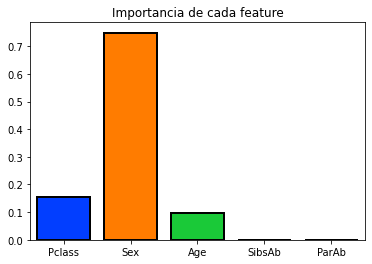

In [62]:
columns=x.columns
sns.barplot(columns, importancies, palette="bright", saturation=2.0, edgecolor="black", linewidth=2)
plt.title("Importancia de cada feature")
plt.show()

# Conclusiones

- Para la clasificación del modelo las variables SibblingsAboard y ParentsAboard no son reelevantes por lo que en un trabajo a futuro pueden llegar a ser removidas.
- La elección del modelo para la clasificación de este tipo de datos 